Part 2 of the NASA Genelab Data Analysis Pipeline

Load required libraries and do some minor pre-processing of the data so that R can read and handle the data better.

In [1]:
library(tximport)
library(DESeq2)
library(dplyr)
library(tidyverse)
library(tidyr)
library(reshape2)
library(grid)
library(ggplot2)
library(ggfortify)
library(ggdendro)
library(ComplexHeatmap)
library(EnhancedVolcano)
library(tidyHeatmap)
library(STRINGdb)
library(PANTHER.db)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [2]:
metadata_dir="/home/nlien/GLDS-373/Metadata"
counts_dir="/home/nlien/GLDS-373/03-RSEM_Counts" 
norm_output="/home/nlien/GLDS-373/04-DESeq2_NormCounts"
norm_input="/home/nlien/GLDS-373/04-DESeq2_NormCounts"
pca_dir="/home/nlien/GLDS-373/04-DESeq2_NormCounts/PCA"
DGE_output="/home/nlien/GLDS-373/05-DESeq2_DGE"
DGE_plots="/home/nlien/GLDS-373/05-DESeq2_DGE/DGE_plots"

In [3]:
sampleTable_full <- read.csv(file.path(metadata_dir,"GLDS-373_Metadata.csv"), 
                  header=TRUE, row.names=2, stringsAsFactors=TRUE)
sampleTable_full

,Source.Name,Characteristics.Organism.,Term.Source.REF,Term.Accession.Number,Characteristics.Strain.,Characteristics.Genotype.,Characteristics.Age.,Term.Source.REF.1,Term.Accession.Number.1,Material.Type,Term.Source.REF.2,Term.Accession.Number.2,Protocol.REF,Factor.Value.Microgravity.Simulation.,Term.Source.REF.3,Term.Accession.Number.3,Factor.Value.Treatment.,Term.Source.REF.4,Term.Accession.Number.4
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<fct>,<fct>,<fct>
GSM4340368,Ng-1,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,mock buffer,,
GSM4340369,Ng-2,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,mock buffer,,
GSM4340370,Ng-3,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,mock buffer,,
GSM4340371,Ng-pIC-1,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,poly I:C,GLDS,https://genelab-data.ndc.nasa.gov/
GSM4340372,Ng-pIC-2,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,poly I:C,GLDS,https://genelab-data.ndc.nasa.gov/
GSM4340373,Ng-pIC-3,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,1G,NA,NA,poly I:C,GLDS,https://genelab-data.ndc.nasa.gov/
GSM4340374,Smg-1,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,uG with rotary cell culture system,NA,NA,mock buffer,,
GSM4340375,Smg-2,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,uG with rotary cell culture system,NA,NA,mock buffer,,
GSM4340376,Smg-3,Danio rerio,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON/7955,AB,Wild Type,12 hours post fertilization (hpf),NA,NA,embryo,ENVO,http://purl.obolibrary.org/obo/UBERON_0000922,treatment protocol,uG with rotary cell culture system,NA,NA,mock buffer,,


In [4]:
#To simplify the metadata, we will only look at the samples (rows) with mock buffer not poly I:C. We will also only pull out the
#microgravity column to generate the contrasts in the next cell.
sampleTable <- sampleTable_full[c(1,2,3,7,8,9),14, drop=FALSE]
sampleTable

,Factor.Value.Microgravity.Simulation.
,<fct>
GSM4340368,1G
GSM4340369,1G
GSM4340370,1G
GSM4340374,uG with rotary cell culture system
GSM4340375,uG with rotary cell culture system
GSM4340376,uG with rotary cell culture system


In [5]:
if (dim(sampleTable) >= 2){
    group<-apply(sampleTable,1,paste,collapse = " & ") # concatenate multiple factors into one condition per sample
} else{
    group<-sampleTable[,1]
}
group_names <- paste0("(",group,")",sep = "") # human readable group names
group <- make.names(group) # group naming compatible with R models
names(group) <- group_names

Warning message in if (dim(sampleTable) >= 2) {:
“the condition has length > 1 and only the first element will be used”


In [6]:
contrasts <- combn(levels(factor(group)),2) # generate matrix of pairwise group combinations for comparison
contrast.names <- combn(levels(factor(names(group))),2)
contrast.names <- c(paste(contrast.names[1,],contrast.names[2,],sep = "v"),paste(contrast.names[2,],contrast.names[1,],sep = "v")) # format combinations for output table files names
contrasts <- cbind(contrasts,contrasts[c(2,1),])
colnames(contrasts) <- contrast.names

In [7]:
contrasts

(1G)v(uG with rotary cell culture system),(uG with rotary cell culture system)v(1G)
uG.with.rotary.cell.culture.system,X1G
X1G,uG.with.rotary.cell.culture.system


In [8]:
rawCounts <- (as.matrix(read.csv(Sys.glob(file.path(counts_dir,"GLDS-373_Unnormalized_Counts.csv")), header = TRUE, row.names = 1, stringsAsFactors = TRUE)))
rawCounts <- rawCounts[,c(1,2,3,7,8,9)]
rawCounts <- ceiling(rawCounts)
head(rawCounts)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376
ENSDARG00000000001,112,74,147,22,28,18
ENSDARG00000000002,33,45,51,14,0,10
ENSDARG00000000018,1628,1493,1833,625,529,628
ENSDARG00000000019,1057,919,1151,594,452,518
ENSDARG00000000068,838,651,883,305,323,392
ENSDARG00000000069,1465,1126,1727,552,433,481


In [9]:
dds <- DESeqDataSetFromMatrix(rawCounts, sampleTable, ~Factor.Value.Microgravity.Simulation.)
summary(dds)

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



[1] "DESeqDataSet object of length 32520 with 0 metadata columns"

In [10]:
keep <- rowSums(counts(dds)) > 10
dds <- dds[keep,]

In [11]:
summary(dds)

[1] "DESeqDataSet object of length 19758 with 0 metadata columns"

In [ ]:
write.csv(as.data.frame(counts(dds)), file.path(norm_output,"dds.csv"), row.names=TRUE)

DESeq2 Data Normalization

In [12]:
exp_raw <- log2(rawCounts+1)
PCA_raw <- prcomp(t(exp_raw), scale = FALSE)
summary(PCA_raw)

Importance of components:
                            PC1      PC2      PC3      PC4      PC5       PC6
Standard deviation     233.1480 49.89004 42.20419 36.53810 34.32677 5.841e-14
Proportion of Variance   0.8891  0.04071  0.02913  0.02184  0.01927 0.000e+00
Cumulative Proportion    0.8891  0.92976  0.95889  0.98073  1.00000 1.000e+00

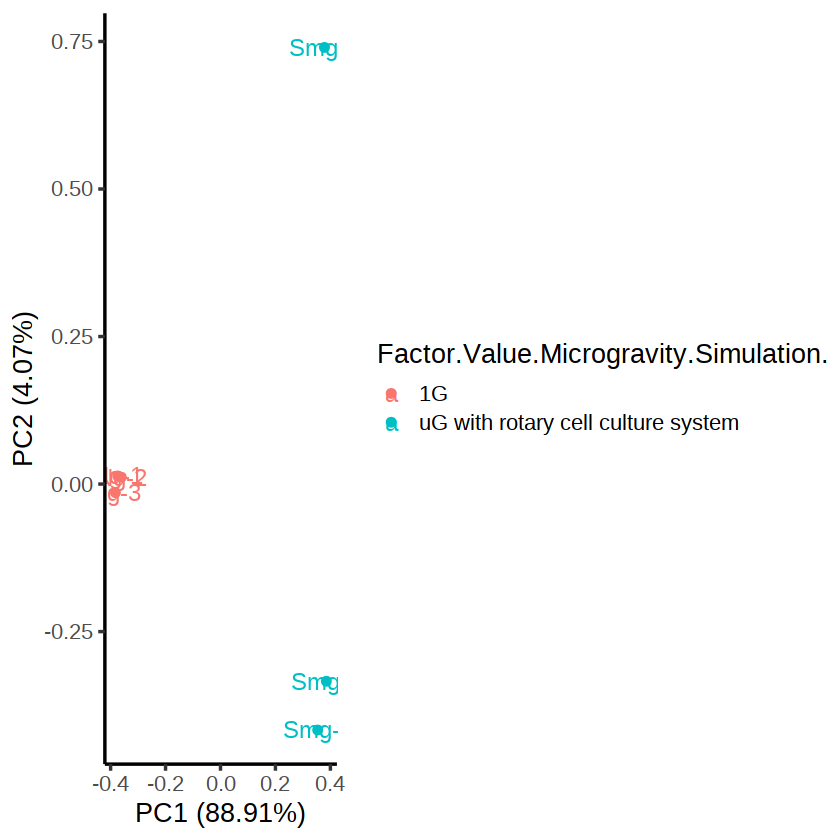

In [130]:
autoplot(PCA_raw, data=sampleTable, colour='Factor.Value.Microgravity.Simulation.',
         label=TRUE, label.size=5, size=2, alpha=1) + theme_classic(base_size = 16)

In [129]:
ggsave(file.path(pca_dir,'GLDS-373_PCA_raw_wlabels.png'), width = 8.5, height = 6, dpi = 100)

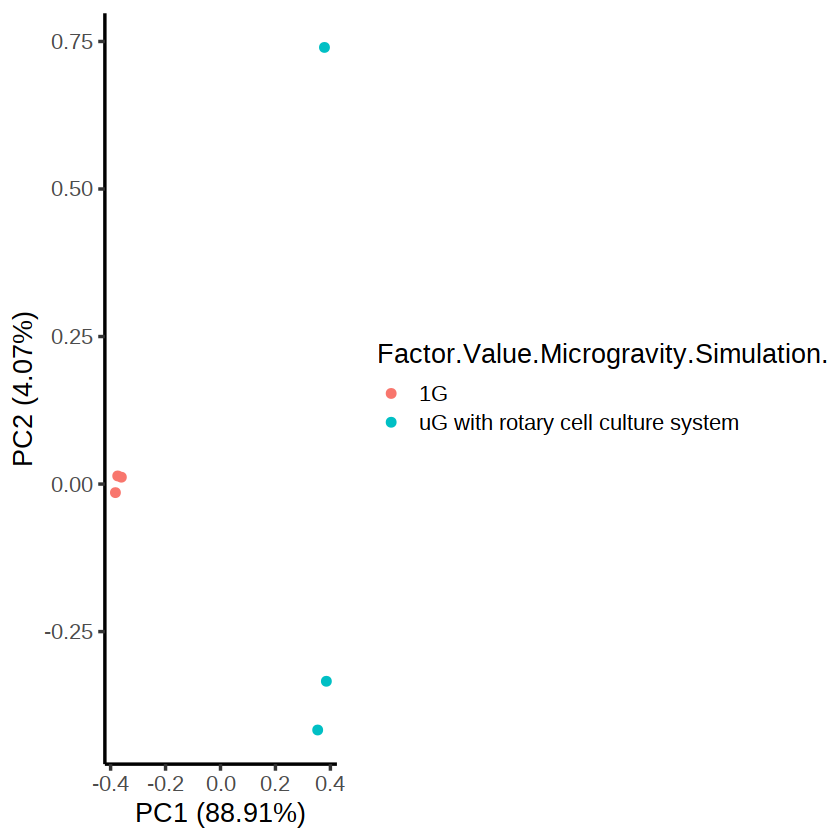

In [132]:
autoplot(PCA_raw, data=sampleTable, colour='Factor.Value.Microgravity.Simulation.', 
         label=FALSE, label.size=5, size=2, alpha=1) + theme_classic(base_size = 16)

## Save your PCA plot without sample labels
ggsave(file.path(pca_dir,'GLDS-373_PCA_raw_nolabels.png'), width = 8.5, height = 6, dpi = 100)

In [133]:
write.csv(PCA_raw$x,file.path(pca_dir,"GLDS-373_PCA_raw_table.csv"), row.names=TRUE)

In [184]:
system("sbatch /home/nlien/GLDS-373/04-DESeq2_NormCounts/DESeq2_Analysis_Script.sh", intern=TRUE)

[1] "Submitted batch job 391082"

In [13]:
normCounts <- read.csv(file.path(norm_input,'Normalized_Counts.csv'), 
                  header=TRUE, row.names=1, stringsAsFactors=TRUE)
head(normCounts)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,75.17884,52.3256,86.09792,32.37871,41.75667,29.50070
ENSDARG00000000002,22.15330,31.8214,29.86479,20.59878,0.00000,16.38662
ENSDARG00000000018,1092.97602,1058.2138,1074.21086,915.36521,791.43582,1027.75196
ENSDARG00000000019,709.65873,649.9025,673.86414,873.71052,674.74394,848.67970
ENSDARG00000000068,565.14611,460.5600,519.29524,445.66132,484.43434,637.48939
ENSDARG00000000069,1040.74634,751.0820,1023.15826,861.04414,698.24920,681.12917


In [14]:
exp_norm <- log2(normCounts+1)
PCA_norm <- prcomp(t(exp_norm), scale = FALSE)

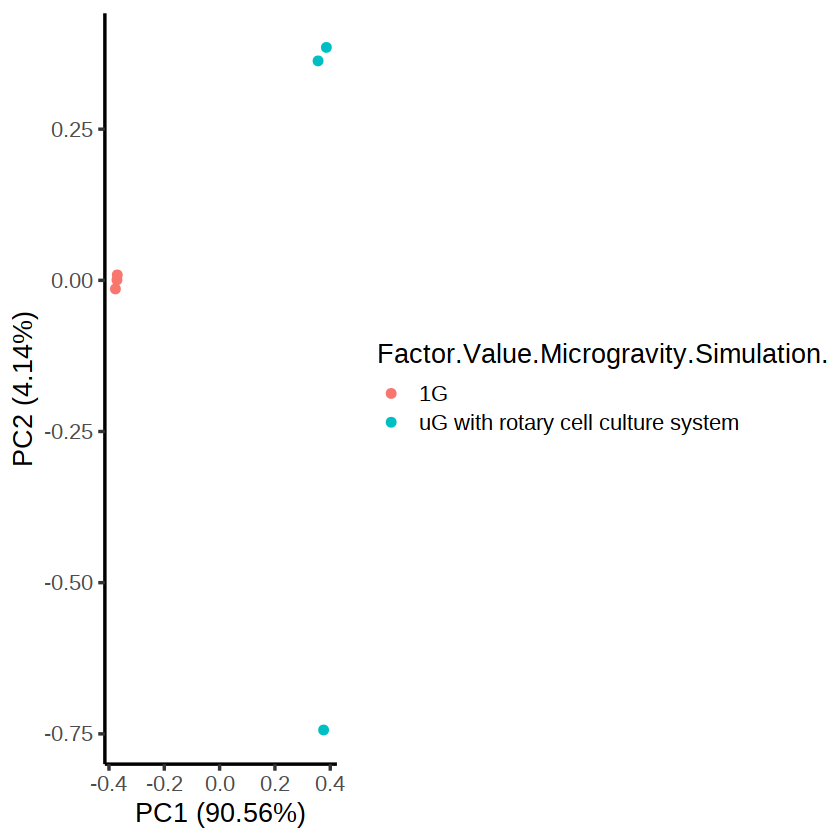

In [18]:
autoplot(PCA_norm, data=sampleTable, colour='Factor.Value.Microgravity.Simulation.', 
         label=FALSE, label.size=5, size=2, alpha=1) + theme_classic(base_size = 16)

## Save your PCA plot without sample labels
ggsave(file.path(pca_dir,'GLDS-373_PCA_norm_nolabels_edit.png'), width = 8.5, height = 6, dpi = 100)

In [180]:
head(normCounts)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,75.17884,52.3256,86.09792,32.37871,41.75667,29.50070
ENSDARG00000000002,22.15330,31.8214,29.86479,20.59878,0.00000,16.38662
ENSDARG00000000018,1092.97602,1058.2138,1074.21086,915.36521,791.43582,1027.75196
ENSDARG00000000019,709.65873,649.9025,673.86414,873.71052,674.74394,848.67970
ENSDARG00000000068,565.14611,460.5600,519.29524,445.66132,484.43434,637.48939
ENSDARG00000000069,1040.74634,751.0820,1023.15826,861.04414,698.24920,681.12917


In [181]:
DGE_output_table <- normCounts
head(DGE_output_table)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,75.17884,52.3256,86.09792,32.37871,41.75667,29.50070
ENSDARG00000000002,22.15330,31.8214,29.86479,20.59878,0.00000,16.38662
ENSDARG00000000018,1092.97602,1058.2138,1074.21086,915.36521,791.43582,1027.75196
ENSDARG00000000019,709.65873,649.9025,673.86414,873.71052,674.74394,848.67970
ENSDARG00000000068,565.14611,460.5600,519.29524,445.66132,484.43434,637.48939
ENSDARG00000000069,1040.74634,751.0820,1023.15826,861.04414,698.24920,681.12917


In [182]:
contrasts

(1G)v(uG with rotary cell culture system),(uG with rotary cell culture system)v(1G)
uG.with.rotary.cell.culture.system,X1G
X1G,uG.with.rotary.cell.culture.system


In [185]:
DGE_output_table <- read.csv(file.path(norm_input,"DGE_output_table.csv"), 
                  header=TRUE, row.names=1, stringsAsFactors=TRUE, check.names=FALSE)
head(DGE_output_table)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376,Log2fc_(1G)v(uG with rotary cell culture system),P.value_(1G)v(uG with rotary cell culture system),Adj.p.value_(1G)v(uG with rotary cell culture system),Log2fc_(uG with rotary cell culture system)v(1G),P.value_(uG with rotary cell culture system)v(1G),Adj.p.value_(uG with rotary cell culture system)v(1G)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,76.17884,53.3256,87.09792,33.37871,42.75667,30.50070,-1.04333101,0.004016272,0.006230662,1.04333101,0.004016272,0.006230662
ENSDARG00000000002,23.15330,32.8214,30.86479,21.59878,1.00000,17.38662,-1.18347419,0.124096605,0.153723694,1.18347419,0.124096605,0.153723694
ENSDARG00000000018,1093.97602,1059.2138,1075.21086,916.36521,792.43582,1028.75196,-0.23894632,0.062489599,0.081639369,0.23894632,0.062489599,0.081639369
ENSDARG00000000019,710.65873,650.9025,674.86414,874.71052,675.74394,849.67970,0.23706088,0.089365396,0.113528176,-0.23706088,0.089365396,0.113528176
ENSDARG00000000068,566.14611,461.5600,520.29524,446.66132,485.43434,638.48939,0.01939681,0.911435308,0.923657117,-0.01939681,0.911435308,0.923657117
ENSDARG00000000069,1041.74634,752.0820,1024.15826,862.04414,699.24920,682.12917,-0.32968299,0.054365716,0.071677297,0.32968299,0.054365716,0.071677297


In [186]:
DGE_output_table$All.mean <- rowMeans(normCounts, na.rm = TRUE, dims = 1)
DGE_output_table$All.stdev <- rowSds(as.matrix(normCounts), na.rm = TRUE, dims = 1)

In [187]:
head(DGE_output_table)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376,Log2fc_(1G)v(uG with rotary cell culture system),P.value_(1G)v(uG with rotary cell culture system),Adj.p.value_(1G)v(uG with rotary cell culture system),Log2fc_(uG with rotary cell culture system)v(1G),P.value_(uG with rotary cell culture system)v(1G),Adj.p.value_(uG with rotary cell culture system)v(1G),All.mean,All.stdev
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,76.17884,53.3256,87.09792,33.37871,42.75667,30.50070,-1.04333101,0.004016272,0.006230662,1.04333101,0.004016272,0.006230662,52.87307,23.20172
ENSDARG00000000002,23.15330,32.8214,30.86479,21.59878,1.00000,17.38662,-1.18347419,0.124096605,0.153723694,1.18347419,0.124096605,0.153723694,20.13748,11.44550
ENSDARG00000000018,1093.97602,1059.2138,1075.21086,916.36521,792.43582,1028.75196,-0.23894632,0.062489599,0.081639369,0.23894632,0.062489599,0.081639369,993.32561,117.22251
ENSDARG00000000019,710.65873,650.9025,674.86414,874.71052,675.74394,849.67970,0.23706088,0.089365396,0.113528176,-0.23706088,0.089365396,0.113528176,738.42659,97.30919
ENSDARG00000000068,566.14611,461.5600,520.29524,446.66132,485.43434,638.48939,0.01939681,0.911435308,0.923657117,-0.01939681,0.911435308,0.923657117,518.76440,72.32915
ENSDARG00000000069,1041.74634,752.0820,1024.15826,862.04414,699.24920,682.12917,-0.32968299,0.054365716,0.071677297,0.32968299,0.054365716,0.071677297,842.56819,159.68028


In [188]:
tcounts <- as.data.frame(t(normCounts))
tcounts$group <- group
group_means <- as.data.frame(t(aggregate(. ~ group,data = tcounts,mean)))
group_means <- group_means[-c(1),]
colnames(group_means) <- paste0("Group.Mean_",levels(factor(names(group))))
group_stdev <- as.data.frame(t(aggregate(. ~ group,data = tcounts,sd)))
group_stdev <- group_stdev[-c(1),]
colnames(group_stdev) <- paste0("Group.Stdev_",levels(factor(names(group))))

DGE_output_table <- cbind(DGE_output_table,group_means)

DGE_output_table <- cbind(DGE_output_table,group_stdev)

In [189]:
head(DGE_output_table)

,GSM4340368,GSM4340369,GSM4340370,GSM4340374,GSM4340375,GSM4340376,Log2fc_(1G)v(uG with rotary cell culture system),P.value_(1G)v(uG with rotary cell culture system),Adj.p.value_(1G)v(uG with rotary cell culture system),Log2fc_(uG with rotary cell culture system)v(1G),P.value_(uG with rotary cell culture system)v(1G),Adj.p.value_(uG with rotary cell culture system)v(1G),All.mean,All.stdev,Group.Mean_(1G),Group.Mean_(uG with rotary cell culture system),Group.Stdev_(1G),Group.Stdev_(uG with rotary cell culture system)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSDARG00000000001,76.17884,53.3256,87.09792,33.37871,42.75667,30.50070,-1.04333101,0.004016272,0.006230662,1.04333101,0.004016272,0.006230662,52.87307,23.20172,34.54536,71.20079,6.408823,17.234007
ENSDARG00000000002,23.15330,32.8214,30.86479,21.59878,1.00000,17.38662,-1.18347419,0.124096605,0.153723694,1.18347419,0.124096605,0.153723694,20.13748,11.44550,12.32847,27.94649,10.882503,5.111549
ENSDARG00000000018,1093.97602,1059.2138,1075.21086,916.36521,792.43582,1028.75196,-0.23894632,0.062489599,0.081639369,0.23894632,0.062489599,0.081639369,993.32561,117.22251,911.5177,1075.1336,118.20504,17.39948
ENSDARG00000000019,710.65873,650.9025,674.86414,874.71052,675.74394,849.67970,0.23706088,0.089365396,0.113528176,-0.23706088,0.089365396,0.113528176,738.42659,97.30919,799.0447,677.8084,108.37273,30.07276
ENSDARG00000000068,566.14611,461.5600,520.29524,446.66132,485.43434,638.48939,0.01939681,0.911435308,0.923657117,-0.01939681,0.911435308,0.923657117,518.76440,72.32915,522.5283,515.0005,101.42912,52.42515
ENSDARG00000000069,1041.74634,752.0820,1024.15826,862.04414,699.24920,682.12917,-0.32968299,0.054365716,0.071677297,0.32968299,0.054365716,0.071677297,842.56819,159.68028,746.8075,938.3289,99.30147,162.39882


In [201]:
DGE_final_output_table <- read.csv(file.path(DGE_output,"differential_expression.csv"), 
                  header=TRUE, stringsAsFactors=TRUE, check.names=FALSE)
head(DGE_final_output_table)

,ENSEMBL,SYMBOL,GENENAME,REFSEQ,ENTREZID,STRING_id,GOSLIM_IDS,GSM4340368,GSM4340369,GSM4340370,⋯,Log2fc_(uG with rotary cell culture system)v(1G),P.value_(uG with rotary cell culture system)v(1G),Adj.p.value_(uG with rotary cell culture system)v(1G),All.mean,All.stdev,LRT.p.value,Group.Mean_(1G),Group.Mean_(uG with rotary cell culture system),Group.Stdev_(1G),Group.Stdev_(uG with rotary cell culture system)
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSDARG00000000001,slc35a5,solute carrier family 35 member A5,NM_200654,368418,NA,"GO:0000139, GO:0005622, GO:0005623, GO:0005737, GO:0005773, GO:0005794, GO:0005886, GO:0012505, GO:0016020, GO:0016021, GO:0030173, GO:0031090, GO:0031224, GO:0031300, GO:0031301, GO:0031984, GO:0043226, GO:0043227, GO:0043229, GO:0043231, GO:0044422, GO:0044424, GO:0044425, GO:0044431, GO:0044444, GO:0044446, GO:0044464, GO:0071944, GO:0098588, GO:0098791",76.17884,53.3256,87.09792,⋯,1.04333101,0.004016272,0.006230662,53.87307,23.20172,0.005861164,35.54536,72.20079,6.408823,17.234007
2,ENSDARG00000000002,ccdc80,coiled-coil domain containing 80,NM_001007198,368419,NA,,23.15330,32.8214,30.86479,⋯,1.18347419,0.124096605,0.153723694,21.13748,11.44550,0.155330740,13.32847,28.94649,10.882503,5.111549
3,ENSDARG00000000018,nrf1,nuclear respiratory factor 1,NM_001328540,64604,NA,,1093.97602,1059.2138,1075.21086,⋯,0.23894632,0.062489599,0.081639369,994.32561,117.22251,0.081489069,912.51770,1076.13360,118.205040,17.399480
4,ENSDARG00000000019,ube2h,"ubiquitin-conjugating enzyme E2H (UBC8 homolog, yeast)",NM_201489,368425,NA,"GO:0003824, GO:0004842, GO:0006464, GO:0006508, GO:0006511, GO:0006807, GO:0008152, GO:0009056, GO:0009057, GO:0009987, GO:0016567, GO:0016740, GO:0019538, GO:0019787, GO:0019941, GO:0030163, GO:0032446, GO:0036211, GO:0043170, GO:0043412, GO:0043632, GO:0044237, GO:0044238, GO:0044248, GO:0044257, GO:0044260, GO:0044265, GO:0044267, GO:0051603, GO:0061650, GO:0070647, GO:0071704, GO:0140096, GO:1901564, GO:1901565, GO:1901575",710.65873,650.9025,674.86414,⋯,-0.23706088,0.089365396,0.113528176,739.42659,97.30919,0.113449865,800.04470,678.80840,108.372730,30.072760
5,ENSDARG00000000068,slc9a3r1a,SLC9A3 regulator 1a,NM_212707,327272,NA,,566.14611,461.5600,520.29524,⋯,-0.01939681,0.911435308,0.923657117,519.76440,72.32915,0.922395645,523.52830,516.00050,101.429120,52.425150
6,ENSDARG00000000069,dap,death-associated protein,NM_131572,58093,NA,,1041.74634,752.0820,1024.15826,⋯,0.32968299,0.054365716,0.071677297,843.56819,159.68028,0.071724554,747.80750,939.32890,99.301470,162.398820


In [190]:
exp_norm <- log2(normCounts+1)

In [202]:
dge_p <- DGE_final_output_table[DGE_final_output_table$`Adj.p.value_(1G)v(uG with rotary cell culture system)`<0.05,] # filter by adj p-value
dge_p_flc_up <- dge_p[dge_p$`Log2fc_(1G)v(uG with rotary cell culture system)`>1,] # filter by lfc > 1
dge_p_flc_down <- dge_p[dge_p$`Log2fc_(1G)v(uG with rotary cell culture system)`< -1,] # filter by lfc < -1
dge_full <- rbind(dge_p_flc_up, dge_p_flc_down) # merge together

dge_p_flc <- dge_full[rowSums(is.na(dge_full)) != ncol(dge_full), ] # remove rows with NA

In [203]:
dim(dge_p_flc)

[1] 12113    26

In [204]:
exp_dge <- exp_norm[dge_p_flc$ENSEMBL,]
dim(exp_dge)

[1] 12113     6

PCA Analysis

In [205]:
PCA_dge <- prcomp(t(exp_dge), scale = FALSE)

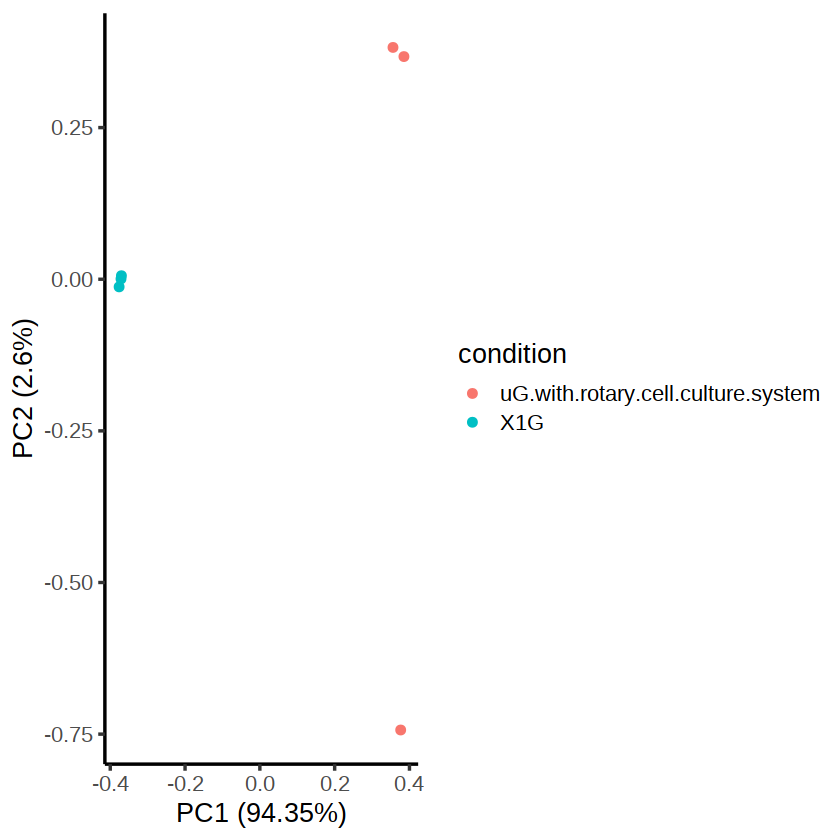

In [207]:
## Create your PCA plot without samples labeled
autoplot(PCA_dge, data=sampleTable, colour='condition', 
         label=FALSE, label.size=5, size=2, alpha=1) + theme_classic(base_size = 16)

## Save your PCA plot without samples labeled
ggsave(file.path(DGE_plots,'GLDS-373_PCA_DGE_nolabels.png'), width = 8.5, height = 6, dpi = 100)

Heatmap

In [209]:
exp_dge_scale <- apply(exp_dge, MARGIN = 2, FUN = function(X) (X - min(X))/diff(range(X)))

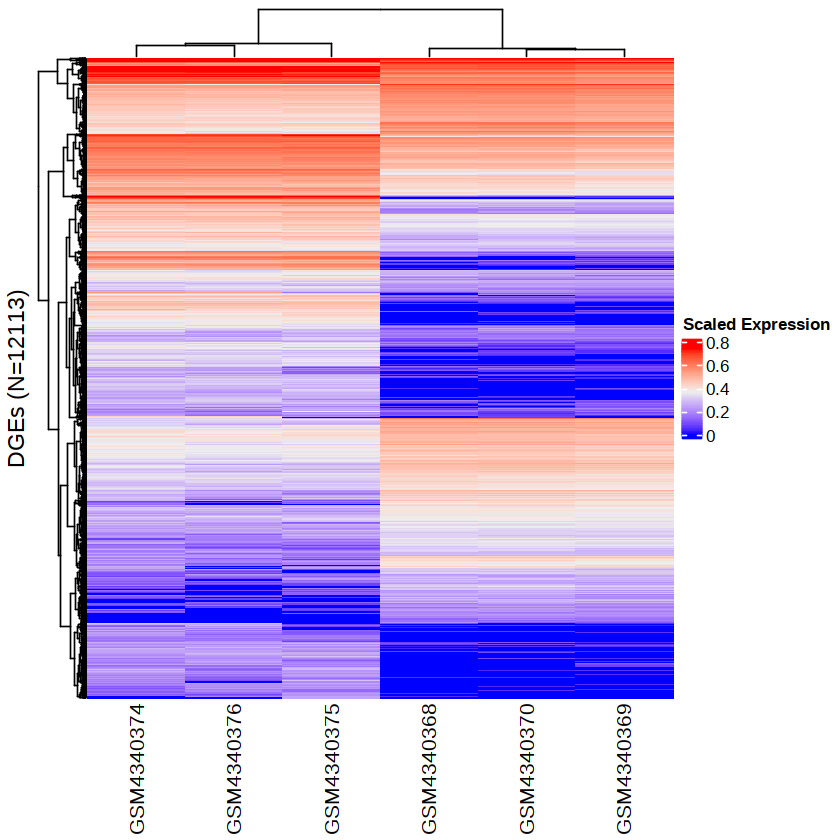

In [211]:
Heatmap(exp_dge_scale, show_row_names=FALSE, row_title="DGEs (N=12113)", 
   heatmap_legend_param = list(title="Scaled Expression"))

In [212]:
heatmap = Heatmap(exp_dge_scale, show_row_names=FALSE, row_title="DGEs (N=12113)", 
   heatmap_legend_param = list(title="Scaled Expression"))
save_pdf(heatmap, file.path(DGE_plots,'GLDS-373_heatmap_DGE.pdf'),
        width = 5, height = 5, units = c("in", "cm", "mm"))

Volcano Plot

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


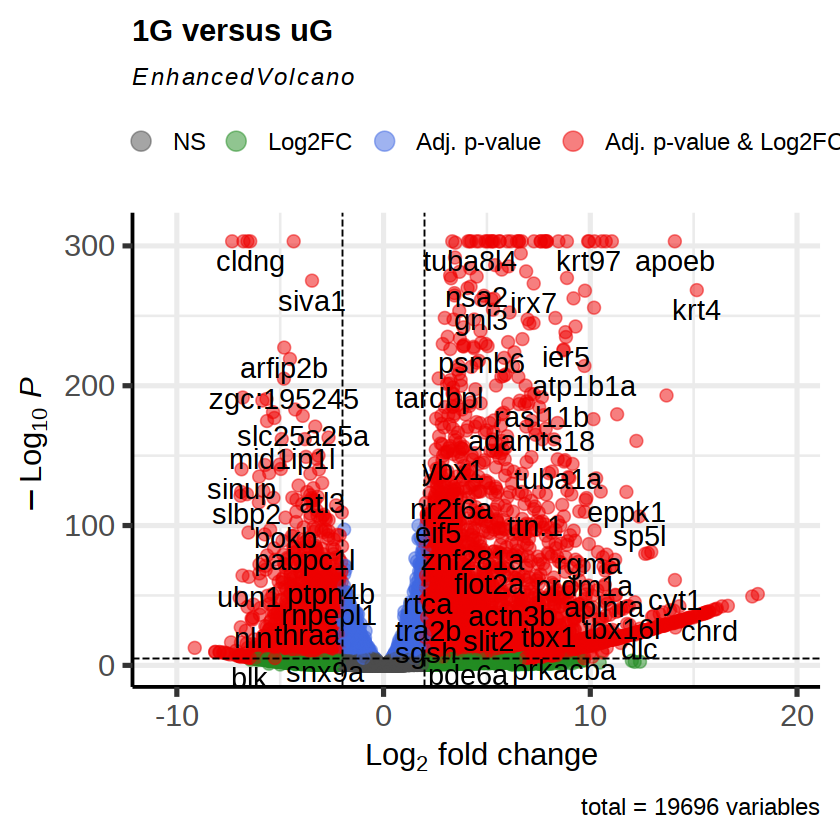

In [214]:
# Volcano plot showing genes differentially expressed in FLT vs GC
EnhancedVolcano(DGE_final_output_table,
    lab = DGE_final_output_table$SYMBOL,
    x = 'Log2fc_(1G)v(uG with rotary cell culture system)',
    y = 'Adj.p.value_(1G)v(uG with rotary cell culture system)',
    title = '1G versus uG',
    legendLabels=c('NS','Log2FC','Adj. p-value',
      'Adj. p-value & Log2FC'),
    pCutoff = 10e-6,
    FCcutoff = 2,
    pointSize = 3.0,
    labSize = 6.0,
    colAlpha=0.5)

## Save your volcano plot
ggsave(file.path(DGE_plots,'GLDS-373_volcano_DGE.png'), width = 6, height = 8.5, dpi = 110)